<a href="https://colab.research.google.com/github/dhvanipatel000/CE090_ML_Labs/blob/main/ML_Lab2_CE090.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
datasets = pd.read_csv('Data_for_Transformation.csv')
print("Data: \n",datasets) 
X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y)
X_new = datasets.iloc[:,1:3].values 
print("\n\nX for transformation : \n", X_new)
#min max normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new) 
print("\n\nScaled X : \n", X_scaled)
#standardization
std = StandardScaler() 
X_std = std.fit_transform(X_new)
print("\n\nStandardized X : \n", X_std)


Data: 
     Country  Age  Salary Purchased
0    France   44   72000        No
1     Spain   27   48000       Yes
2   Germany   30   54000        No
3     Spain   38   61000        No
4   Germany   40   68000       Yes
5    France   35   58000       Yes
6     Spain   39   52000        No
7    France   48   79000       Yes
8   Germany   50   83000        No
9    France   37   67000       Yes
10    Spain   45   55000        No


Input : 
 [['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 68000]
 ['France' 35 58000]
 ['Spain' 39 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]
 ['Spain' 45 55000]]


Output: 
 ['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


X for transformation : 
 [[   44 72000]
 [   27 48000]
 [   30 54000]
 [   38 61000]
 [   40 68000]
 [   35 58000]
 [   39 52000]
 [   48 79000]
 [   50 83000]
 [   37 67000]
 [   45 55000]]


Scaled X : 
 [[0.73913043 0.68571429]
 [0.         0.       

In [ ]:
 # Step 1: Import Libraries
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Step 2: Load Data
datasets = pd.read_csv('Data_for_Categorical_Values.csv') 
print("\nData :\n",datasets) 
print("\nData statistics\n",datasets.describe())
 # Step 3: Seprate Input and Output attributes
# All rows, all columns except last X = datasets.iloc[:, :-1].values
# Only last column Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)
# Step 4a: Apply LabelEncoder on the data # to convert country names into numeric values
le = LabelEncoder() 
X[ : ,0] = le.fit_transform(X[ : ,0]) 
print("\n\nInput : \n", X)



Data :
     Country  Age  Salary Purchased
0    France   44   72000        No
1     Spain   27   48000       Yes
2   Germany   30   54000        No
3     Spain   38   61000        No
4   Germany   40   68000       Yes
5    France   35   58000       Yes
6     Spain   39   52000        No
7    France   48   79000       Yes
8   Germany   50   83000        No
9    France   37   67000       Yes
10    Spain   45   55000        No

Data statistics
              Age        Salary
count  11.000000     11.000000
mean   39.363636  63363.636364
std     7.131237  11386.594989
min    27.000000  48000.000000
25%    36.000000  54500.000000
50%    39.000000  61000.000000
75%    44.500000  70000.000000
max    50.000000  83000.000000


Input : 
 [['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 68000]
 ['France' 35 58000]
 ['Spain' 39 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]
 ['Spain' 45 55000]]


Output: 
 ['No' 'Yes' 'No' 'N

In [ ]:
 # Step 4b: Use dummy variables from pandas library # to create one column for each country
dummy = pd.get_dummies(datasets['Country']) 
print("\n\nDummy :\n",dummy) 
#datasets = datasets.drop(['Country','Purchased'],axis=1) 
datasets = pd.concat([dummy,datasets],axis=1) 
print("\n\nFinal Data :\n",datasets)




Dummy :
     France  Germany  Spain
0        1        0      0
1        0        0      1
2        0        1      0
3        0        0      1
4        0        1      0
5        1        0      0
6        0        0      1
7        1        0      0
8        0        1      0
9        1        0      0
10       0        0      1


Final Data :
     France  Germany  Spain  Country  Age  Salary Purchased
0        1        0      0   France   44   72000        No
1        0        0      1    Spain   27   48000       Yes
2        0        1      0  Germany   30   54000        No
3        0        0      1    Spain   38   61000        No
4        0        1      0  Germany   40   68000       Yes
5        1        0      0   France   35   58000       Yes
6        0        0      1    Spain   39   52000        No
7        1        0      0   France   48   79000       Yes
8        0        1      0  Germany   50   83000        No
9        1        0      0   France   37   67000       Yes


In [ ]:
#Use One Hot Encoder from scikit learn 
onehotencoder = OneHotEncoder() 
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
x = onehotencoder.fit_transform(datasets.Country.values.reshape(-1,1)).toarray()
print(x)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
dfOneHot = pd.DataFrame(x, columns = ["Country_"+str(int(i)) for i in range(datasets.shape[1]-1)]) 
df = pd.concat([datasets, dfOneHot], axis=1) 
#column
# droping the country column 
df= df.drop(['Country'], axis=1) 
#printing to verify 
print(df.head())


In [ ]:
#Steps for Handling the missing value

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
# Step 2: Load Data
datasets = pd.read_csv('Data_for_Missing_Values.csv')
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())



Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000


In [ ]:
# Step 3: Seprate Input and Output attributes
# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)




Input : 
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 [nan nan nan]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]


Output: 
 ['No' 'Yes' 'No' 'No' nan 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


In [ ]:
 # Step 4: Find the missing values and handle it in either way
# 4a. Removing the row with all null values
datasets.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",datasets)
#4b. Removing the row with any one null values
#datasets.dropna(axis=0,how='any',inplace=True)


New Data :     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [ ]:
updated_df = datasets;
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    11 non-null     object 
 1   Age        11 non-null     float64
 2   Salary     10 non-null     float64
 3   Purchased  11 non-null     object 
dtypes: float64(2), object(2)
memory usage: 440.0+ bytes


In [ ]:
datasets


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,Germany,40.0,NaN,Yes
6,France,35.0,58000.0,Yes
7,Spain,39.4,52000.0,No
8,France,48.0,79000.0,Yes
9,Germany,50.0,83000.0,No
10,France,37.0,67000.0,Yes


In [ ]:
updated_df = datasets;
updated_df['Salary']=updated_df['Salary'].fillna(updated_df['Salary'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    11 non-null     object 
 1   Age        11 non-null     float64
 2   Salary     11 non-null     float64
 3   Purchased  11 non-null     object 
dtypes: float64(2), object(2)
memory usage: 440.0+ bytes


In [ ]:
datasets


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,Germany,40.0,62900.0,Yes
6,France,35.0,58000.0,Yes
7,Spain,39.4,52000.0,No
8,France,48.0,79000.0,Yes
9,Germany,50.0,83000.0,No
10,France,37.0,67000.0,Yes


In [ ]:
new_X = datasets.iloc[:, :-1].values
# Only last column
new_Y = datasets.iloc[:, -1].values


In [ ]:
#using SimpleImputer from Scikit-Learn Library

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
# Step 2: Load Data
datasets = pd.read_csv('Data_for_Missing_Values.csv')
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())



Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000


In [ ]:
 # Step 3: Seprate Input and Output attributes
# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)



Input : 
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 [nan nan nan]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]


Output: 
 ['No' 'Yes' 'No' 'No' nan 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


In [ ]:
# Step 4: Find the missing values and handle it in either way
# 4a. Removing the row with all null values
datasets.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",datasets)
#4b. Removing the row with any one null values
#datasets.dropna(axis=0,how='any',inplace=True)



New Data :     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [ ]:
# 4b. Imputation (Replacing null values with mean value of that attribute)
# All rows, all columns except last
new_X = datasets.iloc[:, :-1].values
# Only last column
new_Y = datasets.iloc[:, -1].values
updated_df['Age'].fillna(updated_df['Age'].mean())
# Using Imputer function to replace NaN values with mean of that parameter value

imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
# Fitting the data, function learns the stats
imputer = imputer.fit(new_X[:, 1:3])
# fit_transform() will execute those stats on the input ie. X[:, 1:3]
new_X[:, 1:3] = imputer.transform(new_X[:, 1:3])
# filling the missing value with mean
print("\n\nNew Input with Mean Value for NaN : \n\n", new_X)



New Input with Mean Value for NaN : 

 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 62900.0]
 ['France' 35.0 58000.0]
 ['Spain' 39.4 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]


In [ ]:
#Correlation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_csv('Data_for_Correlation.csv')
data.head()

,X1,X2,X3,X4,Y
0,1,1,4,-2,1
1,2,4,5,-4,1
2,3,9,6,3,0
3,4,16,7,4,0
4,5,25,8,25,1


In [ ]:
data = data.iloc[:,:-1]
data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      14 non-null     int64
 1   X2      14 non-null     int64
 2   X3      14 non-null     int64
 3   X4      14 non-null     int64
dtypes: int64(4)
memory usage: 576.0 bytes


In [ ]:
## Selecting features based on correlation Generating the correlation matrix
corr = data.corr()
corr.head()

,X1,X2,X3,X4
X1,1.000000,0.972714,1.000000,0.263266
X2,0.972714,1.000000,0.972714,0.163575
X3,1.000000,0.972714,1.000000,0.263266
X4,0.263266,0.163575,0.263266,1.000000


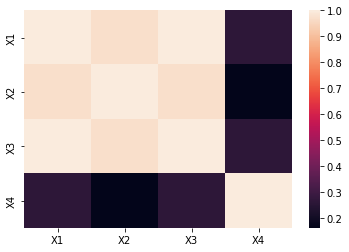

In [ ]:
sns.heatmap(corr)


In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
          columns[j] = False

In [ ]:
selected_columns = data.columns[columns]
selected_columns.shape
data = data[selected_columns]
print(data)


    X1   X4
0    1   -2
1    2   -4
2    3    3
3    4    4
4    5   25
5    6   76
6    7   34
7    8  346
8    9   67
9   10    3
10  11  355
11  12   88
12  13    2
13  14    1


EXERCISE

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
dt = pd.read_csv('Exercise-CarData.csv')
dt.tail()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015
1435,1435,6950,76.0,1,Petrol,110,0.0,0,1600,5,1114


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

x_new = dt.iloc[:,1:3].values
# MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_new)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.3250444  0.27848101]
 [0.3339254  0.27848101]
 [0.3410302  0.29113924]
 ...
 [0.14742451        nan]
 [0.10301954 0.87341772]
 [0.09236234 0.94936709]]


In [ ]:
# standardscaler
std = StandardScaler()
X_std = std.fit_transform(x_new)
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[ 0.76376268 -1.75818903]
 [ 0.83271485 -1.75818903]
 [ 0.88787659 -1.70437596]
 ...
 [-0.6152808          nan]
 [-0.96004167  0.7710253 ]
 [-1.04278428  1.09390373]]


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le = LabelEncoder()
x = dt.iloc[:, :5].values
x[: ,4] = le.fit_transform(x[ : ,4])
print(x) 


[[0 13500 23.0 '46986' 1]
 [1 13750 23.0 '72937' 1]
 [2 13950 24.0 '41711' 1]
 ...
 [1433 8500 nan '17016' 2]
 [1434 7250 70.0 '??' 3]
 [1435 6950 76.0 '1' 2]]


In [ ]:
dm = pd.get_dummies(dt['FuelType'])
print("\n\nDummy :\n",dm)
# datasets = datasets.drop(['Country','Purchased'],axis=1)
dt = pd.concat([dm,dt],axis=1)
print("\n\nFinal Data :\n",dt)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]


Final Data :
       CNG  Diesel  Petrol  Unnamed: 0  Price   Age     KM FuelType   HP  \
0       0       1       0           0  13500  23.0  46986   Diesel   90   
1       0       1       0           1  13750  23.0  72937   Diesel   90   
2       0       1       0           2  13950  24.0  41711   Diesel   90   
3       0       1       0           3  14950  26.0  48000   Diesel   90   
4       0       1       0           4  13750  30.0  38500   Diesel   90   
...   ...     ...     ...         ...    ...   ...    ...      ...  ...   
1431    0       0       1        1431   7500   NaN  20544   Petrol   86   
1432    0       0       1        143

In [ ]:
# onehotencoder
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(dt.FuelType.values.reshape(-1,1)).toarray()
print(x)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [ ]:
dfOneHot = pd.DataFrame(x, columns = ["FuelType_"+str(int(i)) for i in range(dt.shape[1]-13)])
df = pd.concat([dt, dfOneHot], axis=1) #column
#droping the country column
df= df.drop(['FuelType'], axis=1)
#printing to verify
print(df.head())

In [ ]:
dt.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",dt)
new_x = dt.iloc[:, :-1].values
new_y = dt.iloc[:, -1].values
updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df['MetColor'].fillna(updated_df['MetColor'].mean())
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(new_X[:, 1:3])
new_x[:, 1:3] = imputer.transform(new_x[:, 1:3])
print("\n\nNew Input with Mean Value for NaN : \n\n", new_x)


New Data :       CNG  Diesel  Petrol  Unnamed: 0  Price   Age     KM FuelType   HP  \
0       0       1       0           0  13500  23.0  46986   Diesel   90   
1       0       1       0           1  13750  23.0  72937   Diesel   90   
2       0       1       0           2  13950  24.0  41711   Diesel   90   
3       0       1       0           3  14950  26.0  48000   Diesel   90   
4       0       1       0           4  13750  30.0  38500   Diesel   90   
...   ...     ...     ...         ...    ...   ...    ...      ...  ...   
1431    0       0       1        1431   7500   NaN  20544   Petrol   86   
1432    0       0       1        1432  10845  72.0     ??   Petrol   86   
1433    0       0       1        1433   8500   NaN  17016   Petrol   86   
1434    0       0       0        1434   7250  70.0     ??      NaN   86   
1435    0       0       1        1435   6950  76.0      1   Petrol  110   

      MetColor  Automatic    CC  Doors  Weight  
0          1.0          0  2000  three

NameError: ignored